   Time (ns)   Rg (nm)
0       0.00  0.716922
1       0.01  0.704318
2       0.02  0.707118
3       0.03  0.694415
4       0.04  0.711088


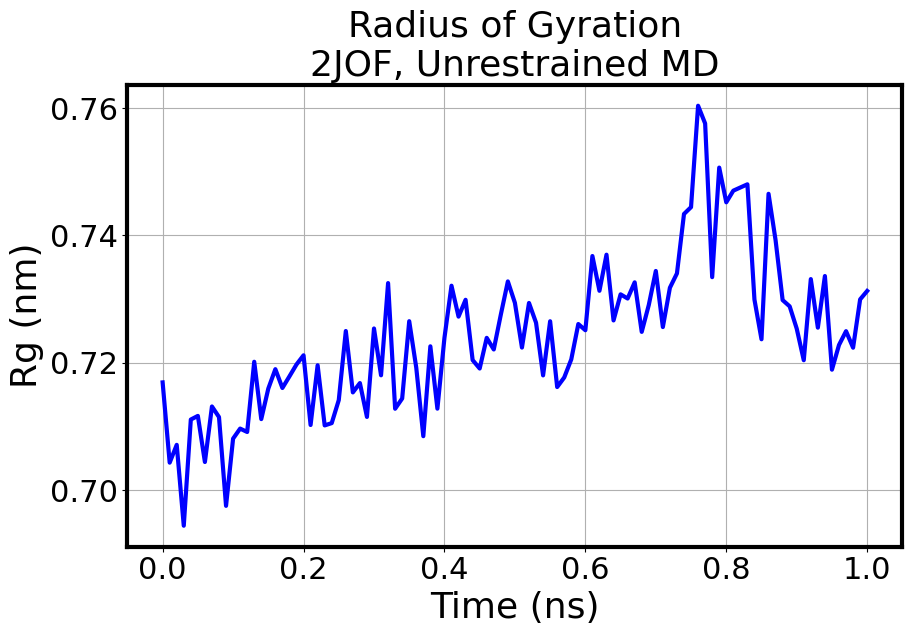

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义 gyrate.xvg 文件的路径
file_path = '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week3-IntroToMD/Data/gyrate.xvg'

# 初始化一个列表来保存数据
data = []

# 手动读取 gyrate.xvg 文件
with open(file_path, 'r') as f:
    for line in f:
        if not line.startswith(('@', '#')):  # 跳过注释行
            fields = line.split()
            if len(fields) >= 2:  # 至少两列
                try:
                    time_ps = float(fields[0])  # 时间（以皮秒为单位）
                    rg_nm = float(fields[1])     # Rg（以纳米为单位）
                    data.append([time_ps / 1000, rg_nm])  # 转换为纳秒
                except ValueError:
                    print(f"Skipping line due to conversion error: {line}")

# 将数据转换为 DataFrame
df = pd.DataFrame(data, columns=['Time (ns)', 'Rg (nm)'])

# 检查 DataFrame 的前几行
print(df.head())

# 检查 DataFrame 是否为空
if df.empty:
    print("DataFrame is empty. No data to plot.")
else:
    # 绘制数据
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (ns)'], df['Rg (nm)'], color='b', linewidth=3)

    # 添加标题和标签
    plt.title('Radius of Gyration\n2JOF, Unrestrained MD', fontsize=26)
    plt.xlabel('Time (ns)', fontsize=26)
    plt.ylabel('Rg (nm)', fontsize=26)

    # 设置坐标轴参数以提高可读性
    plt.tick_params(axis='both', labelsize=22)

    # 启用网格
    plt.grid()

    # 调整边框宽度以获得更清晰的边界
    for spine in plt.gca().spines.values():
        spine.set_linewidth(3)

    # 保存图像到文件
    plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week3-IntroToMD/Figures/gyrate_plot.png', dpi=300, bbox_inches='tight')
    
    # 显示图表
    plt.show()
